<a href="https://colab.research.google.com/github/sezzyz/introduction/blob/main/social_media_engagement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [4]:
df = pd.read_csv("Social Media Engagement Dataset.csv")
df.head()

,post_id,timestamp,day_of_week,platform,user_id,location,language,text_content,hashtags,mentions,...,comments_count,impressions,engagement_rate,brand_name,product_name,campaign_name,campaign_phase,user_past_sentiment_avg,user_engagement_growth,buzz_change_rate
0,kcqbs6hxybia,2024-12-09 11:26:15,Monday,Instagram,user_52nwb0a6,"Melbourne, Australia",pt,Just tried the Chromebook from Google. Best pu...,#Food,NaN,...,701,18991,0.19319,Google,Chromebook,BlackFriday,Launch,0.0953,-0.3672,19.1
1,vkmervg4ioos,2024-07-28 19:59:26,Sunday,Twitter,user_ucryct98,"Tokyo, Japan",ru,Just saw an ad for Microsoft Surface Laptop du...,"#MustHave, #Food","@CustomerService, @BrandCEO",...,359,52764,0.05086,Microsoft,Surface Laptop,PowerRelease,Post-Launch,0.1369,-0.4510,-42.6
2,memhx4o1x6yu,2024-11-23 14:00:12,Saturday,Reddit,user_7rrev126,"Beijing, China",ru,What's your opinion about Nike's Epic React? ...,"#Promo, #Food, #Trending",NaN,...,643,8887,0.45425,Nike,Epic React,BlackFriday,Post-Launch,0.2855,-0.4112,17.4
3,bhyo6piijqt9,2024-09-16 04:35:25,Monday,YouTube,user_4mxuq0ax,"Lagos, Nigeria",en,Bummed out with my new Diet Pepsi from Pepsi! ...,"#Reviews, #Sustainable","@StyleGuide, @BrandSupport",...,743,6696,0.42293,Pepsi,Diet Pepsi,LaunchWave,Launch,-0.2094,-0.0167,-5.5
4,c9dkiomowakt,2024-09-05 21:03:01,Thursday,Twitter,user_l1vpox2k,"Berlin, Germany",hi,Just tried the Corolla from Toyota. Absolutely...,"#Health, #Travel","@BrandSupport, @InfluencerName",...,703,47315,0.08773,Toyota,Corolla,LocalTouchpoints,Launch,0.6867,0.0807,38.8


In [6]:
df['country'] = df['location'].dropna().apply(lambda x: x.split(',')[-1].strip())
print(df[['location', 'country']].head())



               location    country
0  Melbourne, Australia  Australia
1          Tokyo, Japan      Japan
2        Beijing, China      China
3        Lagos, Nigeria    Nigeria
4       Berlin, Germany    Germany


<Axes: title={'center': 'En Çok İçerik Üretilen Ülkeler'}, xlabel='country'>

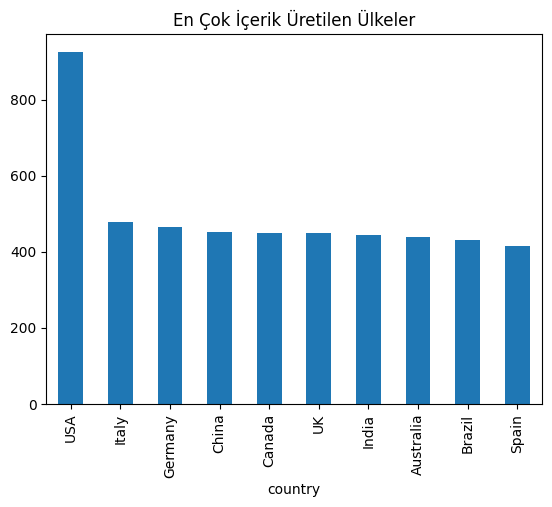

In [7]:
df['country'].value_counts().head(10).plot(kind='bar', title='En Çok İçerik Üretilen Ülkeler')

<Axes: title={'center': 'Platformlara Göre Post Sayısı'}, xlabel='platform'>

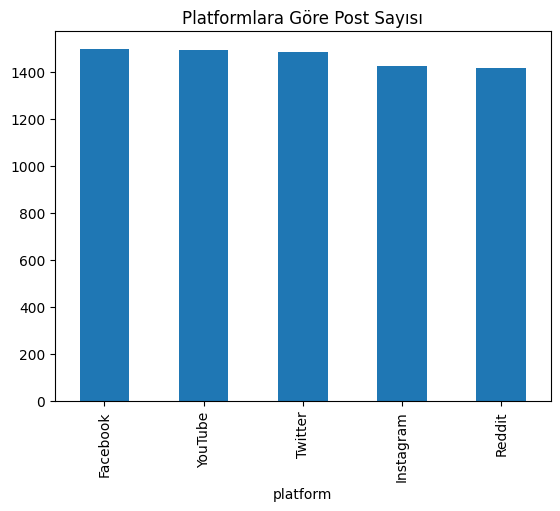

In [8]:
df['platform'].value_counts().plot(kind='bar', title='Platformlara Göre Post Sayısı')


In [16]:

import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-18-7408d83aaef3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_toxic_counts.values, y=platform_toxic_counts.index, palette='rocket')


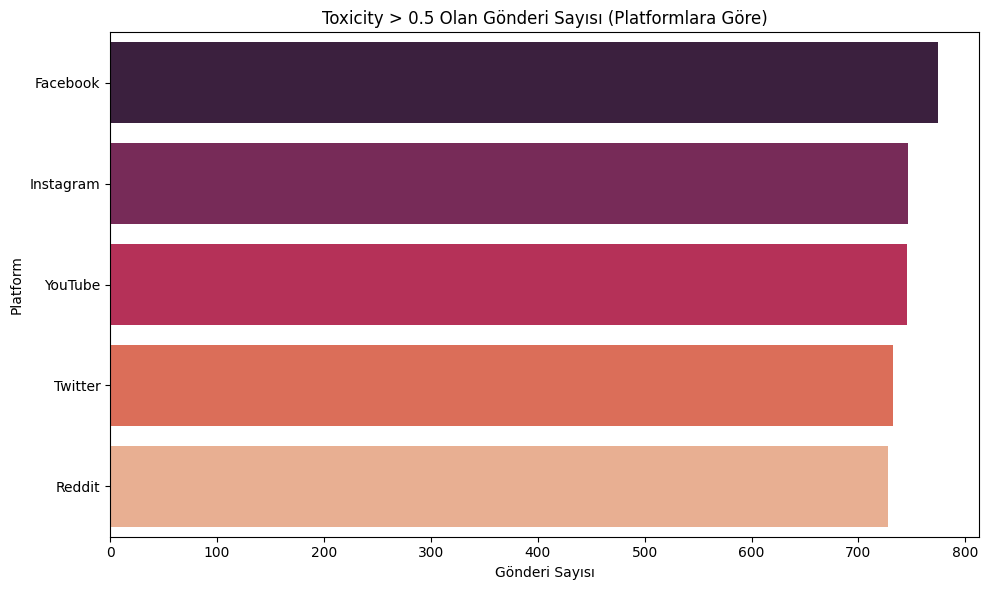

In [18]:
high_toxicity = df[df['toxicity_score'] > 0.5]

platform_toxic_counts = high_toxicity['platform'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=platform_toxic_counts.values, y=platform_toxic_counts.index, palette='rocket')
plt.title('Toxicity > 0.5 Olan Gönderi Sayısı (Platformlara Göre)')
plt.xlabel('Gönderi Sayısı')
plt.ylabel('Platform')
plt.tight_layout()
plt.show()


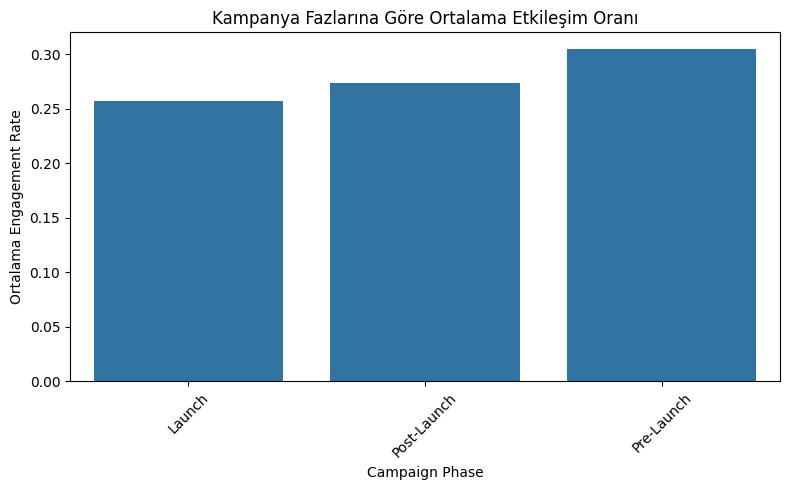

In [19]:
phase_engagement = df.groupby('campaign_phase')['engagement_rate'].mean().sort_values()


plt.figure(figsize=(8,5))
sns.barplot(x=phase_engagement.index, y=phase_engagement.values)
plt.title('Kampanya Fazlarına Göre Ortalama Etkileşim Oranı')
plt.ylabel('Ortalama Engagement Rate')
plt.xlabel('Campaign Phase')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-20-0e61fc4f2931>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_buzz.head(10).values, y=brand_buzz.head(10).index, palette='crest')


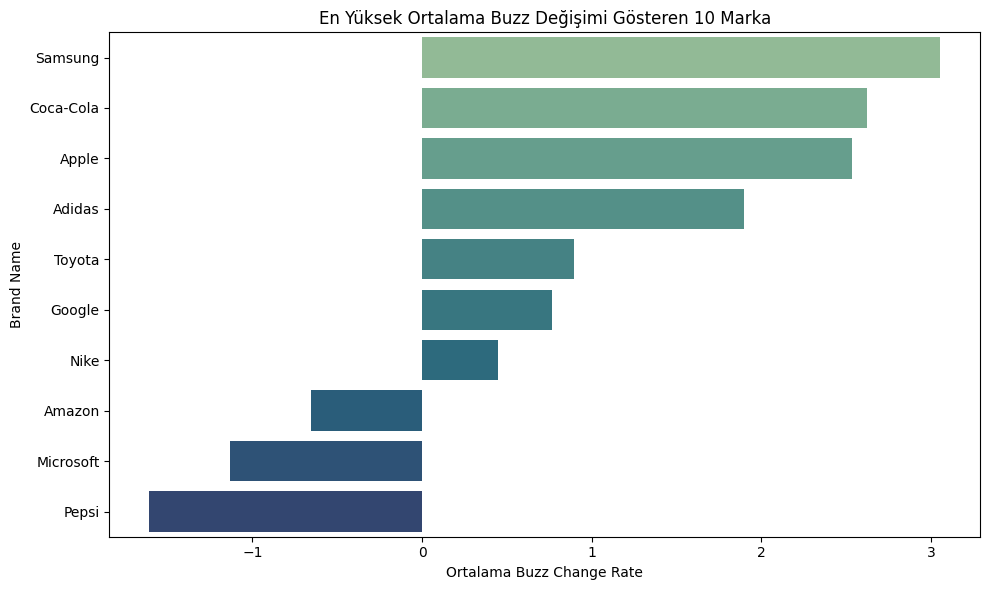

In [20]:
brand_buzz = df.groupby('brand_name')['buzz_change_rate'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=brand_buzz.head(10).values, y=brand_buzz.head(10).index, palette='crest')
plt.title('En Yüksek Ortalama Buzz Değişimi Gösteren 10 Marka')
plt.xlabel('Ortalama Buzz Change Rate')
plt.ylabel('Brand Name')
plt.tight_layout()
plt.show()
